In [1]:
from functools import reduce

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt 
import seaborn as sns

from polyfit import polyfit 
from regress import regress

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Import CSV


In [2]:
data = pd.read_csv("./Data/data.csv")
data

,Country,Region_x,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,0.00,...,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,0.02,...,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
2,Algeria,Africa,38.48,0.73,5430.57,0.60,0.16,0.17,1.14,0.01,...,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
3,Angola,Africa,20.82,0.52,4665.91,0.33,0.15,0.12,0.20,0.09,...,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
4,Argentina,Latin America,41.09,0.83,13540.00,0.78,0.79,0.29,1.08,0.10,...,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Uzbekistan,Middle East/Central Asia,28.54,0.67,1560.85,0.62,0.13,0.08,1.41,0.00,...,5.987,5.896,6.078,0.73591,1.16810,0.50163,0.60848,0.28333,0.34326,2.34638
124,Vietnam,Asia-Pacific,90.80,0.66,1532.31,0.50,0.01,0.19,0.79,0.05,...,5.061,4.991,5.131,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
125,Yemen,Middle East/Central Asia,23.85,0.50,1302.30,0.34,0.14,0.04,0.42,0.04,...,3.724,3.621,3.827,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295
126,Zambia,Africa,14.08,0.58,1740.64,0.19,0.18,0.33,0.24,0.01,...,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991


In [3]:
print(data.columns)

Index(['Country', 'Region_x', 'Population (millions)', 'HDI', 'GDP per Capita',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint',
       'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required', 'Data Quality', 'Region_y',
       'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [16]:
footprints = ['Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint']

capacities = ['Cropland', 'Grazing Land', 'Forest Land', 
              'Urban Land', 'Fishing Water', 'Total Biocapacity']

# plot setup 
plt.style.use('seaborn')
style = dict(size=10, color='gray')
gdpColors = list(reversed(sns.color_palette("viridis",as_cmap=False,n_colors=6)))


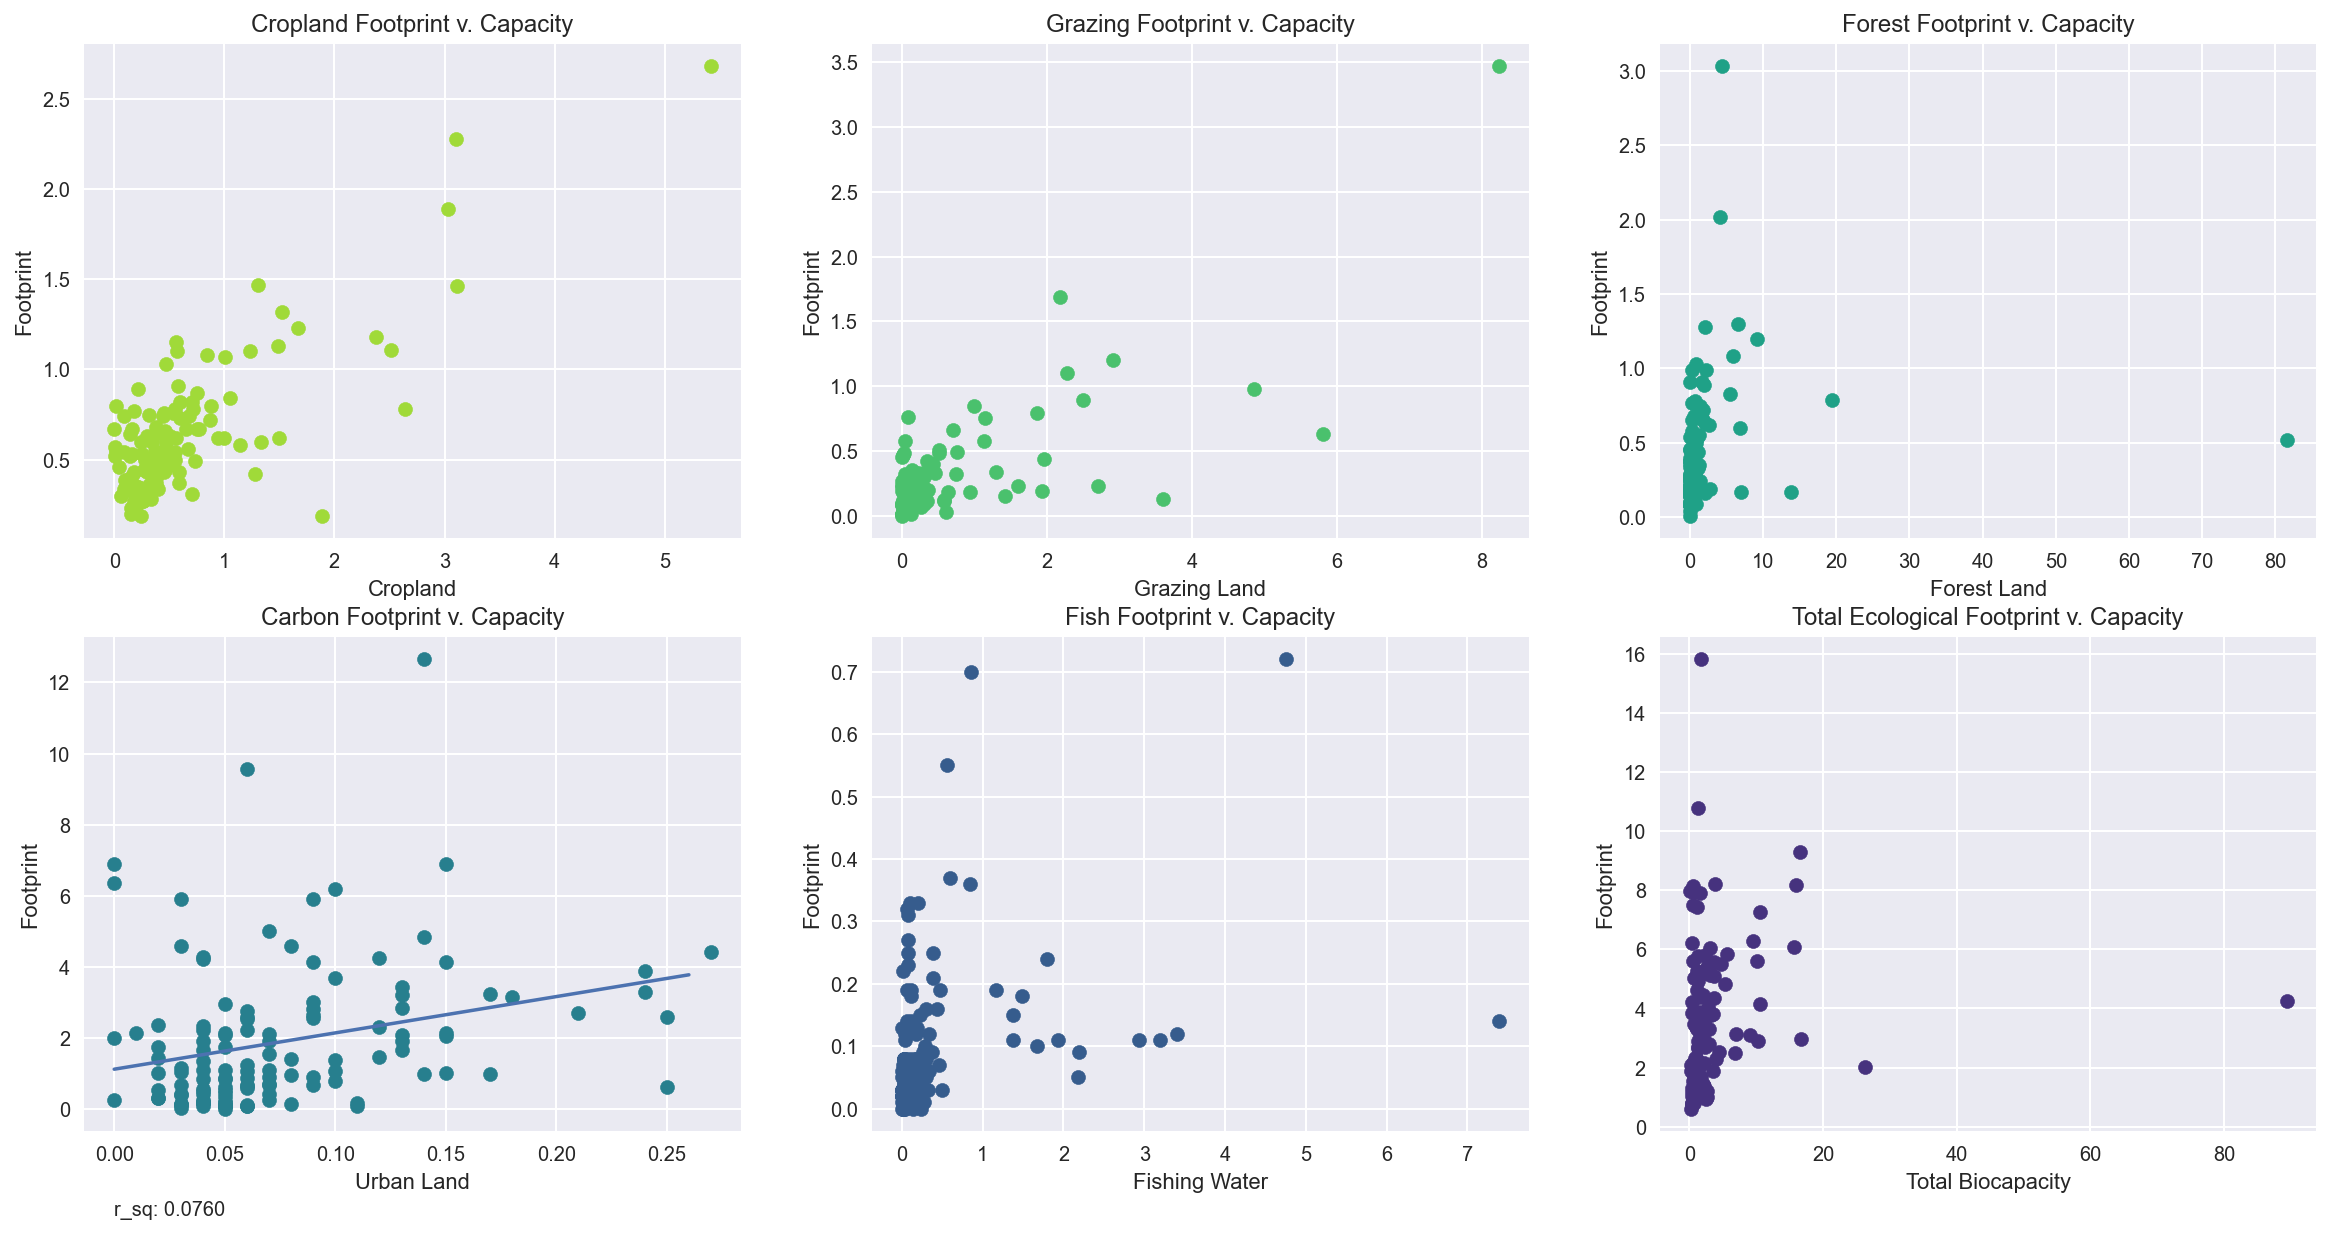

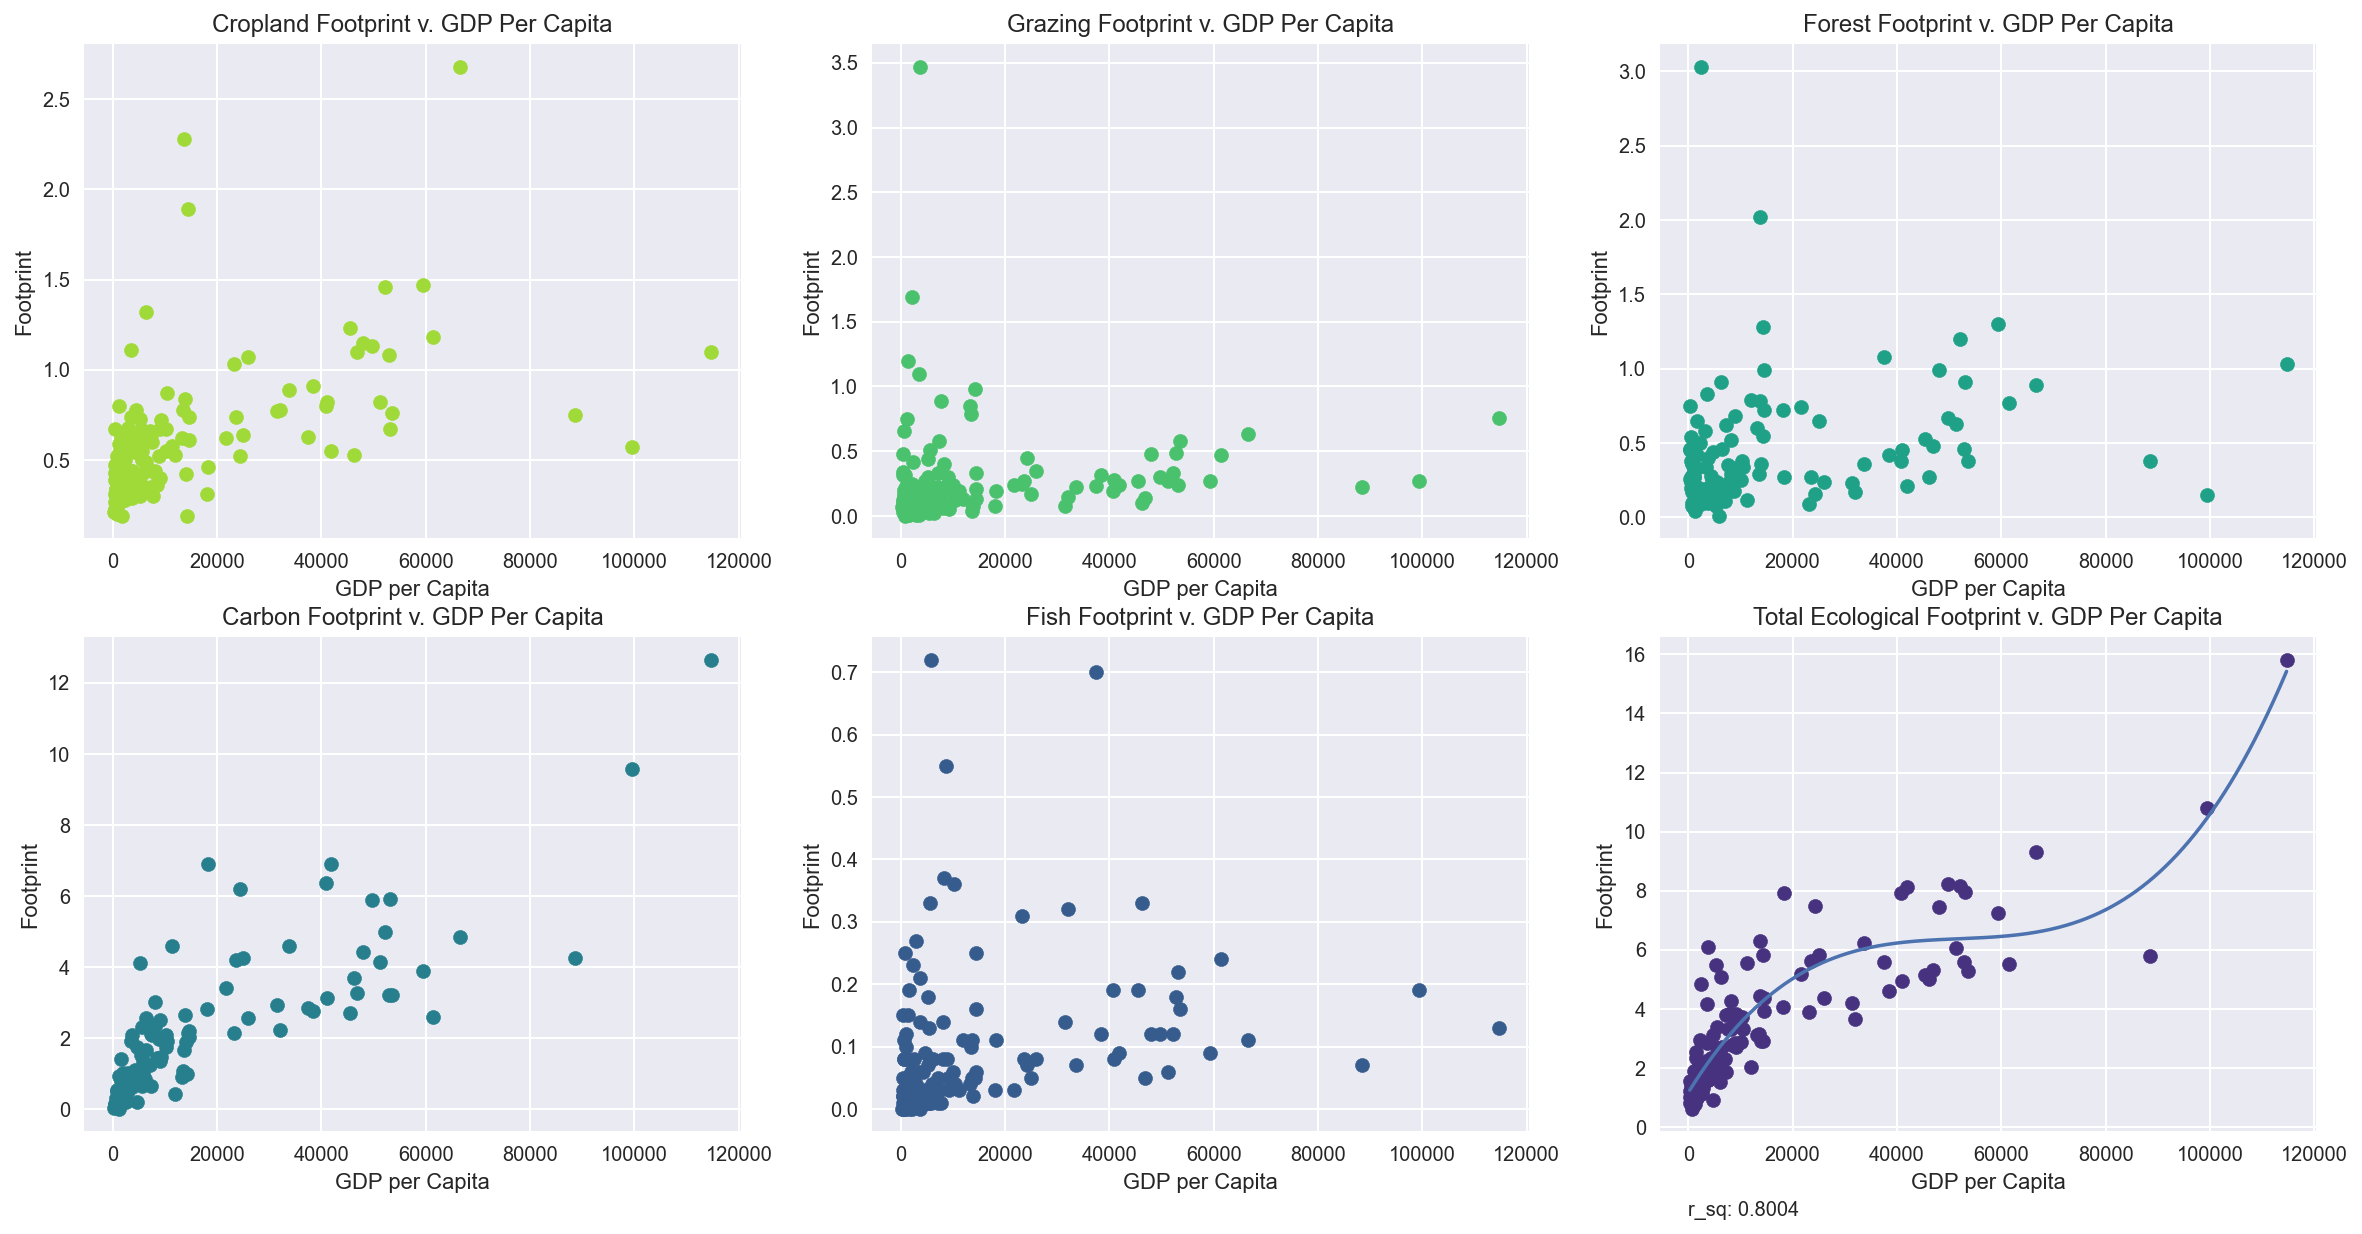

In [5]:
# Maybe some important outliers


plt.figure(figsize=(20, 10))
annotate = 4
for i,f in enumerate(footprints):
    plt.subplot(2,3,i+1)
    plt.title(f + ' v. Capacity')
    plt.scatter(data[capacities[i]], (data[f]), marker='o', color=gdpColors[i])
    plt.xlabel(capacities[i])
    plt.ylabel('Footprint')
    if (annotate == i+1):
        [txt,p,x,y] = regress(data[capacities[i]],data[f],1)
        plt.text(0,-3,txt)
        plt.plot(x,y)
plt.show()


plt.figure(figsize=(20, 10))
annotate = 6
for i,f in enumerate(footprints):
    plt.subplot(2,3,i+1)
    plt.title(f + ' v. GDP Per Capita')
    plt.scatter(data['GDP per Capita'], (data[f]), marker='o', color=gdpColors[i])
    plt.xlabel('GDP per Capita')
    plt.ylabel('Footprint')
    if (annotate == i+1):
        [txt,p,x,y] = regress(data['GDP per Capita'],data[f],3)
        plt.text(0,-3,txt)
        plt.plot(x,y)
plt.show()

[(0.626579, 0.854645, 0.223353), (0.288921, 0.758394, 0.428426), (0.122312, 0.633153, 0.530398), (0.153364, 0.497, 0.557724), (0.212395, 0.359683, 0.55171), (0.275191, 0.194905, 0.496005)]


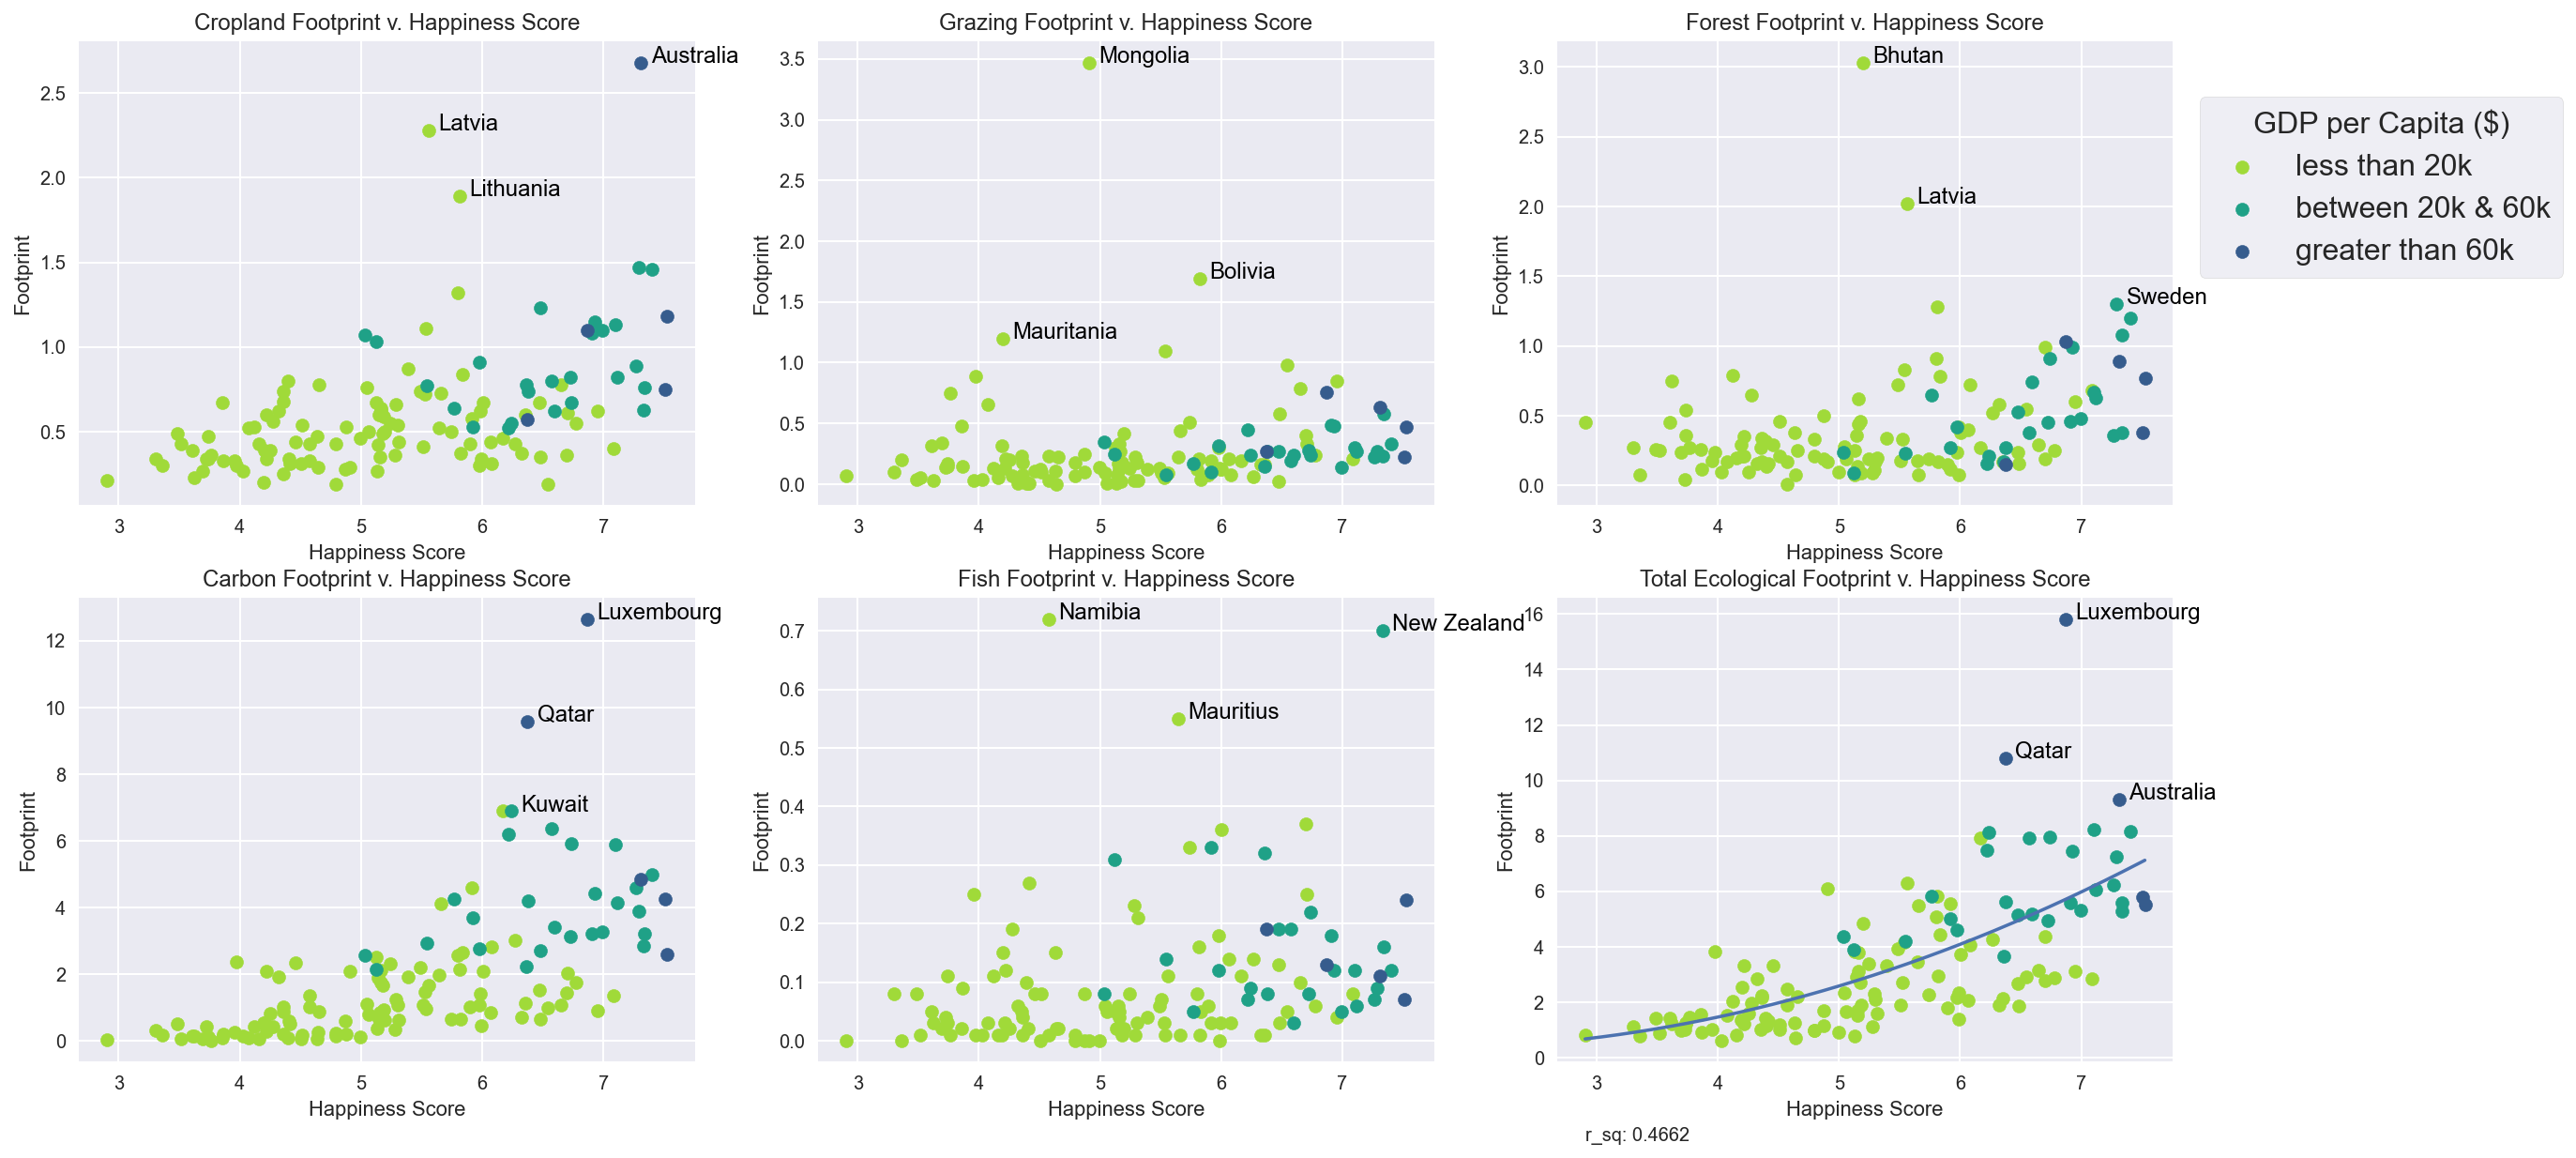

5.1960000000000015
4.84


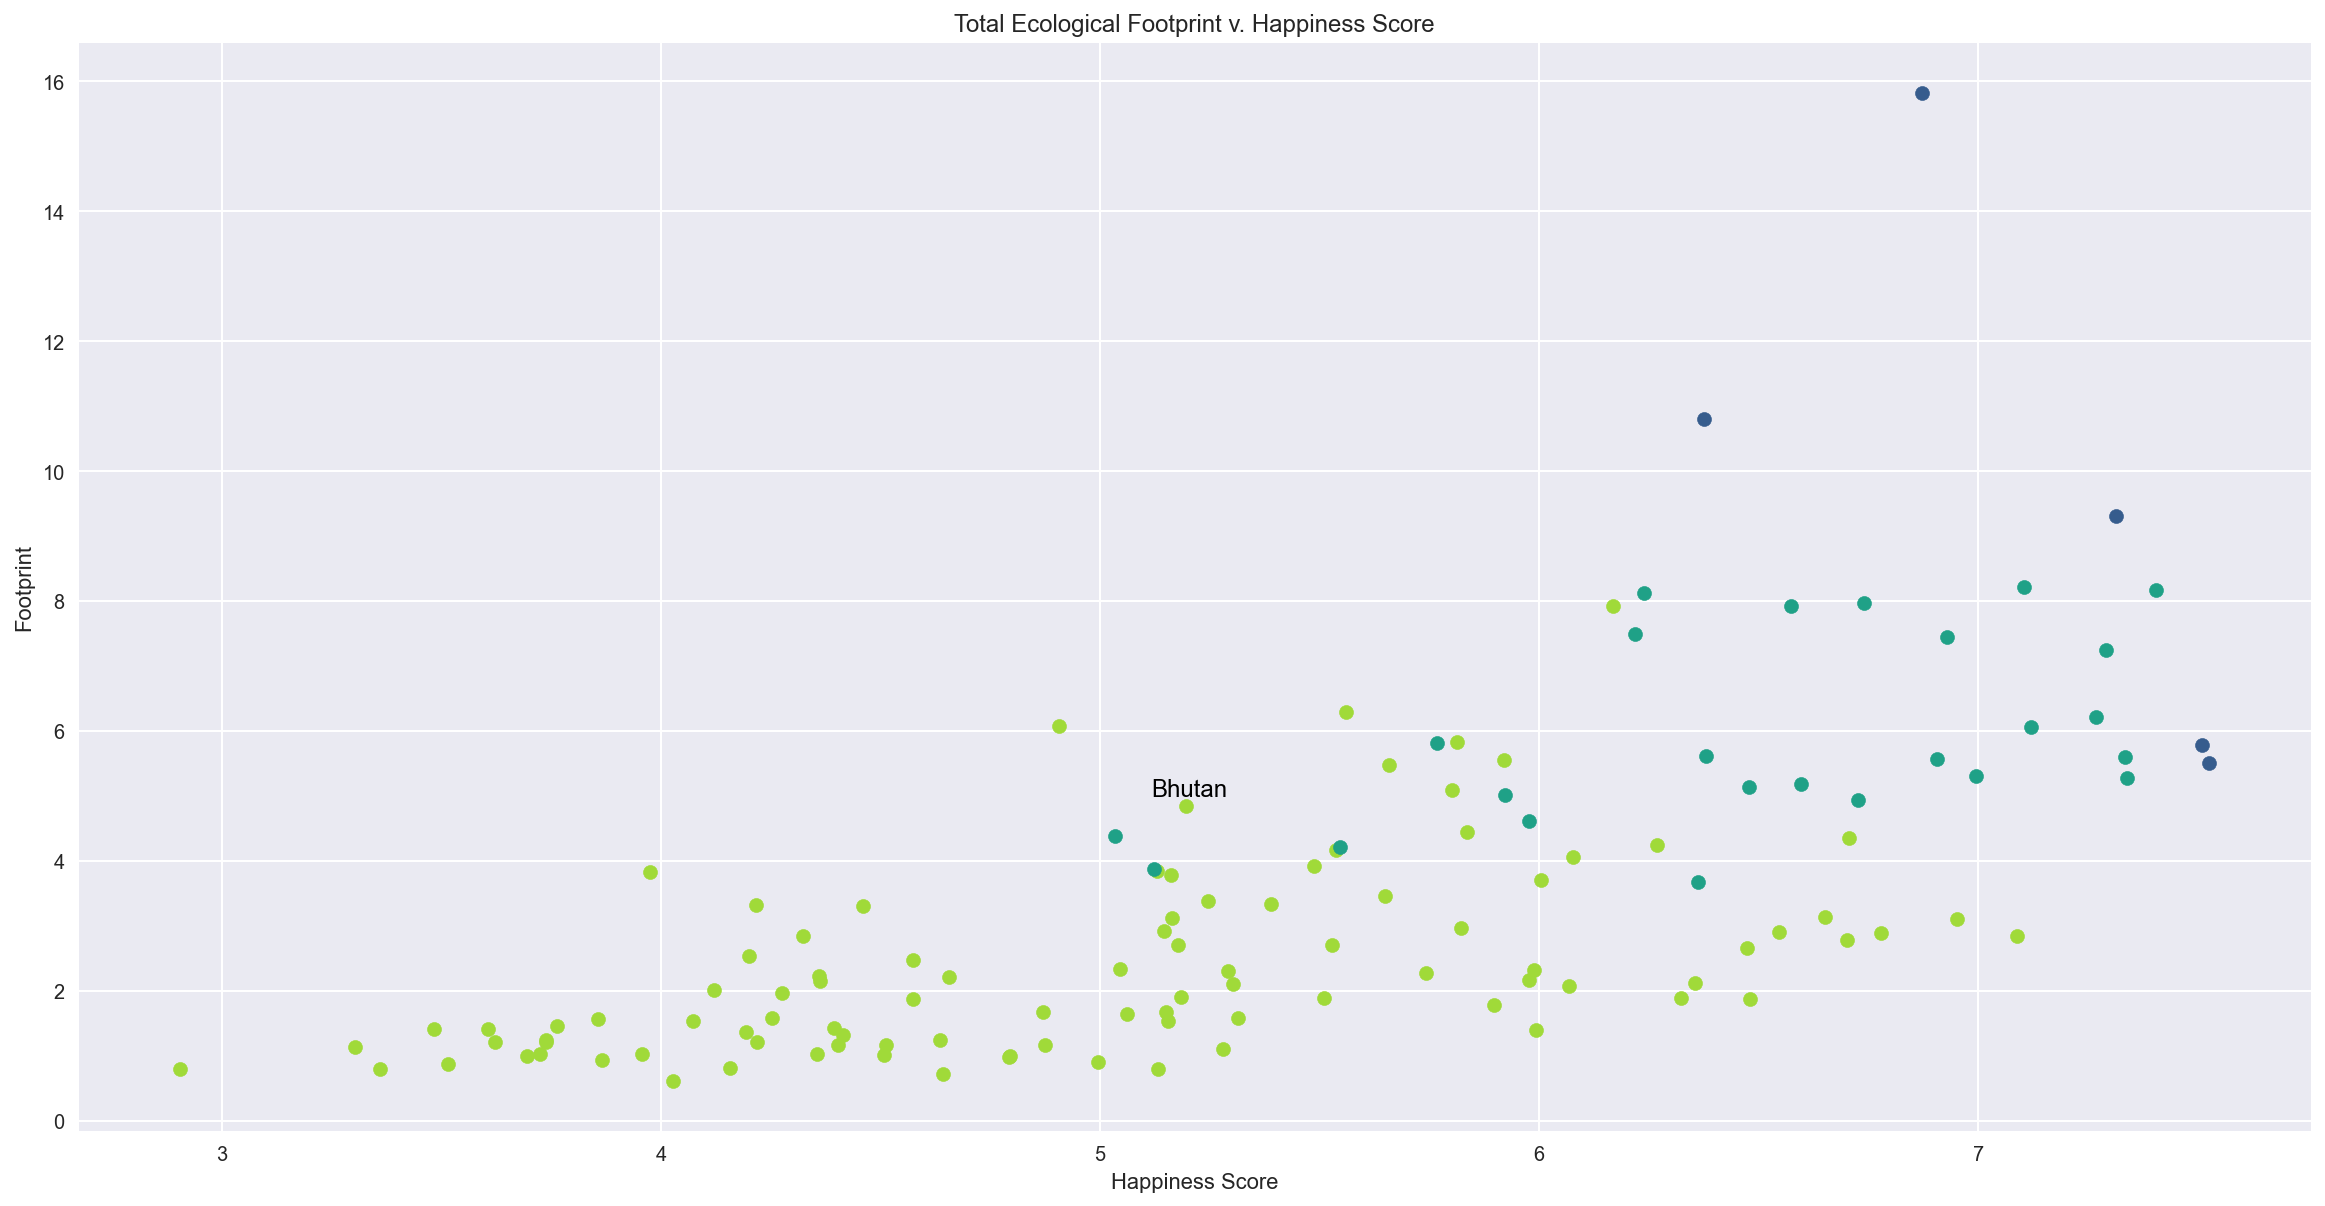

In [36]:

low = data[data['GDP per Capita']<=20000]
med = data[(data['GDP per Capita']>20000) & (data['GDP per Capita']<=60000)]
hi = data[(data['GDP per Capita']>60000)]
top = 3
offset = 0.08

bhutanidx = data.index[data['Country']=='Bhutan']
bhutany = data['Total Ecological Footprint'][bhutanidx].values[0]
bhutanx = data['Happiness Score'][bhutanidx].values[0]

fig,axs = plt.subplots(2,3,figsize=(20, 10))
axs = axs.ravel()
annotate = 6
print(gdpColors)
for i,f in enumerate(footprints):
    max2s = sorted(data[f], reverse=True)[:top]
    idxs = [data.index[data[f]==ymax] for ymax in max2s]
    max1s = [data['Happiness Score'][idx].values[0] for idx in idxs]
    for k in range(len(max1s)):
        axs[i].text(max1s[k]+offset,max2s[k],data['Country'][idxs[k]].values[0], **style)
    for j,datas in enumerate([low,med,hi]):
        axs[i].set_title(f + ' v. Happiness Score')
        axs[i].scatter(datas['Happiness Score'],(datas[f]), marker='o', color=gdpColors[j*2])
        axs[i].set_xlabel('Happiness Score')
        axs[i].set_ylabel('Footprint')
    if annotate == i+1:
        [txt,p,x,y] = regress(data['Happiness Score'].values,data[f].values,2)
        axs[i].plot(x,y)
        axs[i].text(min(data['Happiness Score']),-3,txt)
fig.legend(['less than 20k','between 20k & 60k','greater than 60k'],bbox_to_anchor=(1.05,.85),title='GDP per Capita ($)',title_fontsize=16,fontsize=16,frameon=True)
plt.show()  

plt.figure(figsize=(20, 10))
style = dict(size=12, color='black')
for j,datas in enumerate([low,med,hi]):
    plt.scatter(datas['Happiness Score'],(datas['Total Ecological Footprint']), marker='o', color=gdpColors[j*2])
plt.title('Total Ecological Footprint v. Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Footprint')
plt.text(bhutanx- offset,bhutany+2*offset,'Bhutan', **style)
plt.show()

In [7]:
# # Maybe some important outliers

# plt.style.use('seaborn')

# style = dict(size=10, color='gray')
# gdpColors = list(reversed(sns.color_palette("viridis",as_cmap=False,n_colors=6)))

# fig = plt.figure(figsize=(20, 10))
# # ax = fig.
# plt.subplot(231)
# plt.title('Cropland Footprint v. GDP per Capita')
# plt.scatter(data['GDP per Capita'],(data['Cropland Footprint']), marker='o', color=gdpColors[0])
# plt.xlabel('GDP per Capita')
# plt.ylabel('Footprint')

# plt.subplot(232)
# plt.title('Fish Footprint v. GDP per Capita')
# plt.scatter(data['GDP per Capita'],(data['Fish Footprint']), marker='o', color=gdpColors[1])
# plt.xlabel('GDP per Capita')
# plt.ylabel('Footprint')

# plt.subplot(233)
# plt.title('Carbon Footprint v. GDP per Capita')
# plt.xlabel('GDP per Capita')
# plt.ylabel('Footprint')

# plt.scatter(data['GDP per Capita'],(data['Carbon Footprint']), marker='o', color=gdpColors[2])


# plt.subplot(234)
# plt.title('Forest Footprint v. GDP per Capita')
# plt.scatter(data['GDP per Capita'],(data['Forest Footprint']), marker='o', color=gdpColors[3])
# plt.xlabel('GDP per Capita')
# plt.ylabel('Footprint')

# plt.subplot(235)
# plt.title('Grazing Footprint v. GDP per Capita')
# plt.scatter(data['GDP per Capita'],(data['Grazing Footprint']), marker='o', color=gdpColors[4])  
# plt.xlabel('GDP per Capita')
# plt.ylabel('Footprint')

# plt.subplot(236)
# plt.title('Total Ecological Footprint v. GDP per Capita')
# plt.scatter(data['GDP per Capita'],(data['Total Ecological Footprint']), marker='o', color=gdpColors[5])  
# plt.xlabel('GDP per Capita')
# plt.ylabel('Footprint')


# results = polyfit(data['GDP per Capita'].values,data['Total Ecological Footprint'].values,3)
# print(results)

# p = np.poly1d(results['polynomial'])
# print(max(data['GDP per Capita']))
# x = np.arange(min(data['GDP per Capita']),max(data['GDP per Capita']),0.1)
# y = p(x)
# plt.plot(x,y)

# plt.text(max(data['GDP per Capita'])+5000,0,'r_sq: %.4f' % results['determination'])

# plt.show()

In [8]:
# plt.subplot(2,3,1)
# plt.title('Cropland Footprint v. Capacity')
# plt.scatter(data['Cropland'], (data['Cropland Footprint']), marker='o', color=gdpColors[0])
# plt.xlabel('Cropland')
# plt.ylabel('Footprint')

# plt.subplot(232)
# plt.title('Fish Footprint v. Capacity')
# plt.scatter(data['Fishing Water'], (data['Fish Footprint']), marker='o', color=gdpColors[1])
# plt.xlabel('Fishing Water')
# plt.ylabel('Footprint')
# plt.subplot(233)
# plt.title('Carbon Footprint v. Urban Land')
# plt.xlabel('Urban Land')
# plt.ylabel('Footprint')


# results = polyfit(data['Urban Land'].values,data['Carbon Footprint'].values,1)
# print(results)

# plt.text(0,-3,'r_sq: %.4f' % results['determination'])
# p = np.poly1d(results['polynomial'])
# x = np.arange(0,max(data['Urban Land']),0.01)
# y = p(x)
# plt.plot(x,y)
# plt.scatter(data['Urban Land'], (data['Carbon Footprint']), marker='o', color=gdpColors[2])

# plt.subplot(234)
# plt.title('Forest Footprint v. Capacity')
# plt.scatter(data['Forest Land'], (data['Forest Footprint']), 
#             marker='o', 
#             color=gdpColors[3])
# plt.grid(False)
# plt.rcParams['xtick.bottom'] = True
# plt.xlabel('Forest Land')
# plt.ylabel('Footprint')

# plt.subplot(235)
# plt.title('Grazing Footprint v. Capacity')
# plt.scatter(data['Grazing Land'], (data['Grazing Footprint']), marker='o', color=gdpColors[4])  
# plt.xlabel('Grazing Land')
# plt.ylabel('Footprint')



# plt.show()    

5.1960000000000015
4.84
{'polynomial': [0.19167231908655102, -0.6038794043855179, 0.809653920734335], 'determination': 0.4661523293358716}
7.526


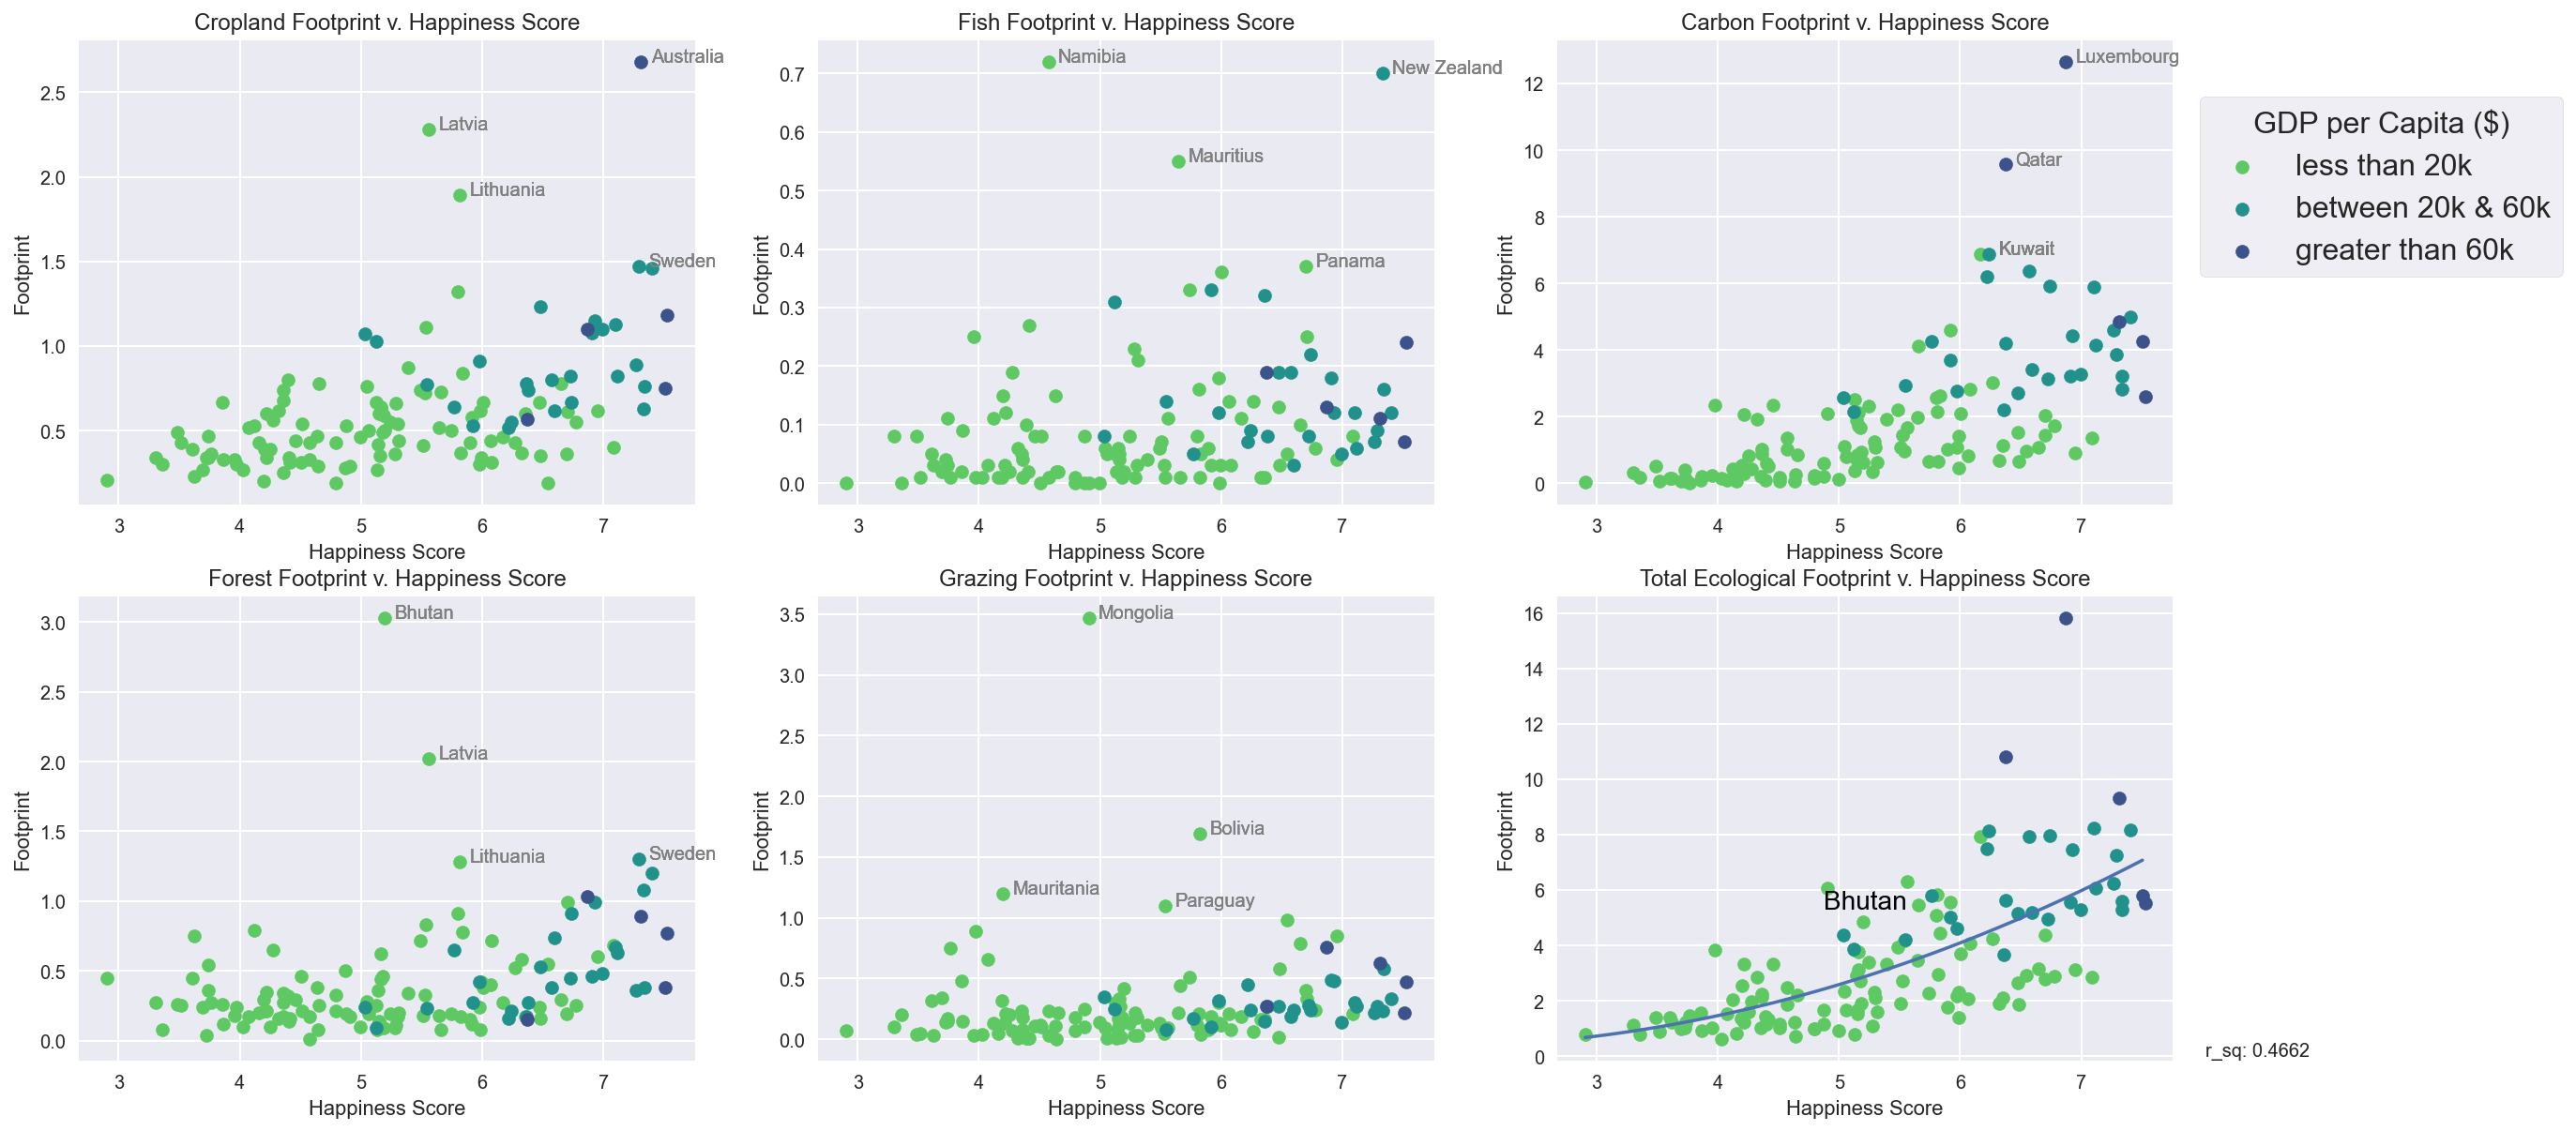

In [9]:
# Maybe some important outliers

# plt.style.use('seaborn')

# style = dict(size=10, color='gray')


low = data[data['GDP per Capita']<=20000]
med = data[(data['GDP per Capita']>20000) & (data['GDP per Capita']<=60000)]
hi = data[(data['GDP per Capita']>60000)]
top = 4
offset = 0.08

# Grab top outliers
ymax1s = sorted(data['Cropland Footprint'], reverse=True)[:top]
idx1s = [data.index[data['Cropland Footprint']==ymax] for ymax in ymax1s]
xmax1s = [data['Happiness Score'][idx].values[0] for idx in idx1s]

ymax2s = sorted(data['Fish Footprint'], reverse=True)[:top]
idx2s = [data.index[data['Fish Footprint']==ymax] for ymax in ymax2s]
xmax2s = [data['Happiness Score'][idx].values[0] for idx in idx2s]

ymax3s = sorted(data['Carbon Footprint'], reverse=True)[:top]
idx3s = [data.index[data['Carbon Footprint']==ymax] for ymax in ymax3s]
xmax3s = [data['Happiness Score'][idx].values[0] for idx in idx3s]

ymax4s = sorted(data['Forest Footprint'], reverse=True)[:top]
idx4s = [data.index[data['Forest Footprint']==ymax] for ymax in ymax4s]
xmax4s = [data['Happiness Score'][idx].values[0] for idx in idx4s]

ymax5s = sorted(data['Grazing Footprint'], reverse=True)[:top]
idx5s = [data.index[data['Grazing Footprint']==ymax] for ymax in ymax5s]
xmax5s = [data['Happiness Score'][idx].values[0] for idx in idx5s]

ymax6s = sorted(data['Total Ecological Footprint'], reverse=True)[:top]
idx6s = [data.index[data['Total Ecological Footprint']==ymax] for ymax in ymax6s]
xmax6s = [data['Happiness Score'][idx].values[0] for idx in idx6s]

bhutanidx = data.index[data['Country']=='Bhutan']
bhutany = data['Total Ecological Footprint'][bhutanidx].values[0]
bhutanx = data['Happiness Score'][bhutanidx].values[0]

# gdpColors = sns.dark_palette("#69d", reverse=True, as_cmap=False,n_colors=3)
gdpColors = list(reversed(sns.color_palette("viridis",as_cmap=False,n_colors=3)))
fig,axs = plt.subplots(2,3,figsize=(20, 10))
for j,datas in enumerate([low,med,hi]):
    axs[0,0].set_title('Cropland Footprint v. Happiness Score')
    axs[0,0].scatter(datas['Happiness Score'],(datas['Cropland Footprint']), marker='o', color=gdpColors[j])
    axs[0,0].set_xlabel('Happiness Score')
    axs[0,0].set_ylabel('Footprint')
    for i in range(len(xmax1s)):
#         print(datas['Country'][idx1s[i]].values[0])
        axs[0,0].text(xmax1s[i]+offset,ymax1s[i],data['Country'][idx1s[i]].values[0], **style)

    axs[0,1].set_title('Fish Footprint v. Happiness Score')
    axs[0,1].scatter(datas['Happiness Score'],(datas['Fish Footprint']), marker='o', color=gdpColors[j])
    axs[0,1].set_xlabel('Happiness Score')
    axs[0,1].set_ylabel('Footprint')
    for i in range(len(xmax2s)):
        axs[0,1].text(xmax2s[i]+offset,ymax2s[i],data['Country'][idx2s[i]].values[0], **style)

    axs[0,2].set_title('Carbon Footprint v. Happiness Score')
    axs[0,2].scatter(datas['Happiness Score'],(datas['Carbon Footprint']), marker='o', color=gdpColors[j])
    axs[0,2].set_xlabel('Happiness Score')
    axs[0,2].set_ylabel('Footprint')
    for i in range(len(xmax3s)):
        axs[0,2].text(xmax3s[i]+offset,ymax3s[i],data['Country'][idx3s[i]].values[0], **style)

    axs[1,0].set_title('Forest Footprint v. Happiness Score')
    axs[1,0].scatter(datas['Happiness Score'],(datas['Forest Footprint']), marker='o', color=gdpColors[j])
    axs[1,0].set_xlabel('Happiness Score')
    axs[1,0].set_ylabel('Footprint')
    for i in range(len(xmax4s)):
        axs[1,0].text(xmax4s[i]+offset,ymax4s[i],data['Country'][idx4s[i]].values[0], **style)

    axs[1,1].set_title('Grazing Footprint v. Happiness Score')
    axs[1,1].scatter(datas['Happiness Score'],(datas['Grazing Footprint']), marker='o', color=gdpColors[j])  
    axs[1,1].set_xlabel('Happiness Score')
    axs[1,1].set_ylabel('Footprint')
    for i in range(len(xmax5s)):
        axs[1,1].text(xmax5s[i]+offset,ymax5s[i],data['Country'][idx5s[i]].values[0], **style)

    axs[1,2].set_title('Total Ecological Footprint v. Happiness Score')
    axs[1,2].scatter(datas['Happiness Score'],(datas['Total Ecological Footprint']), marker='o', color=gdpColors[j])  
    axs[1,2].set_xlabel('Happiness Score')
    axs[1,2].set_ylabel('Footprint')
#     for i in range(len(xmax6s)):
#         axs[1,2].text(xmax6s[i]+offset,ymax6s[i],data['Country'][idx6s[i]].values[0], **style)
        
style = dict(size=14, color='black')
print(bhutanx)
print(bhutany)
axs[1,2].text(bhutanx-4*offset,bhutany+6*offset,'Bhutan', **style)
fig.legend(['less than 20k','between 20k & 60k','greater than 60k'],bbox_to_anchor=(1.05,.85),title='GDP per Capita ($)',title_fontsize=16,fontsize=16,frameon=True)

results = polyfit(data['Happiness Score'].values,data['Total Ecological Footprint'].values,2)
print(results)

p = np.poly1d(results['polynomial'])
print(max(data['Happiness Score']))
x = np.arange(min(data['Happiness Score']),max(data['Happiness Score']),0.1)
y = p(x)
plt.plot(x,y)
plt.text(max(data['Happiness Score'])+0.5,0,'r_sq: %.4f' % results['determination'])
plt.show()  

<ipython-input-10-a33e755ca68c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[data['Countries Required']== max(data['Countries Required'])] = 0


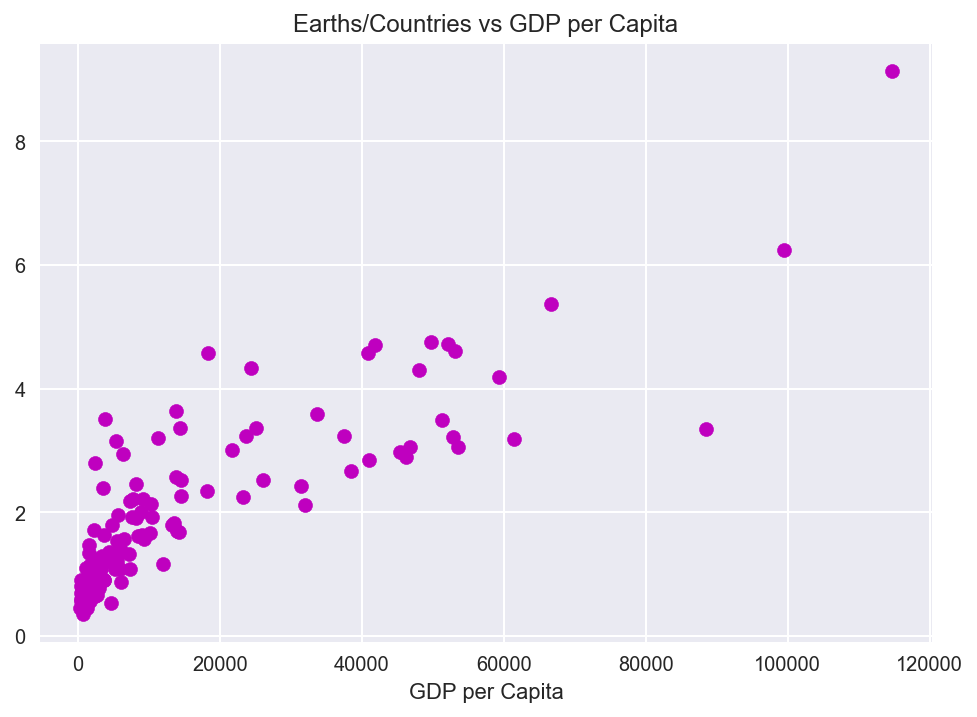

In [10]:
plt.figure()
# set max to zero
tmp = data['Countries Required']
tmp[data['Countries Required']== max(data['Countries Required'])] = 0
# plt.scatter(data['GDP per Capita'], (data['Countries Required']), marker='o', color='r')
plt.scatter(data['GDP per Capita'], (data['Earths Required']), marker='o', color='m')
plt.title('Earths/Countries vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.show()

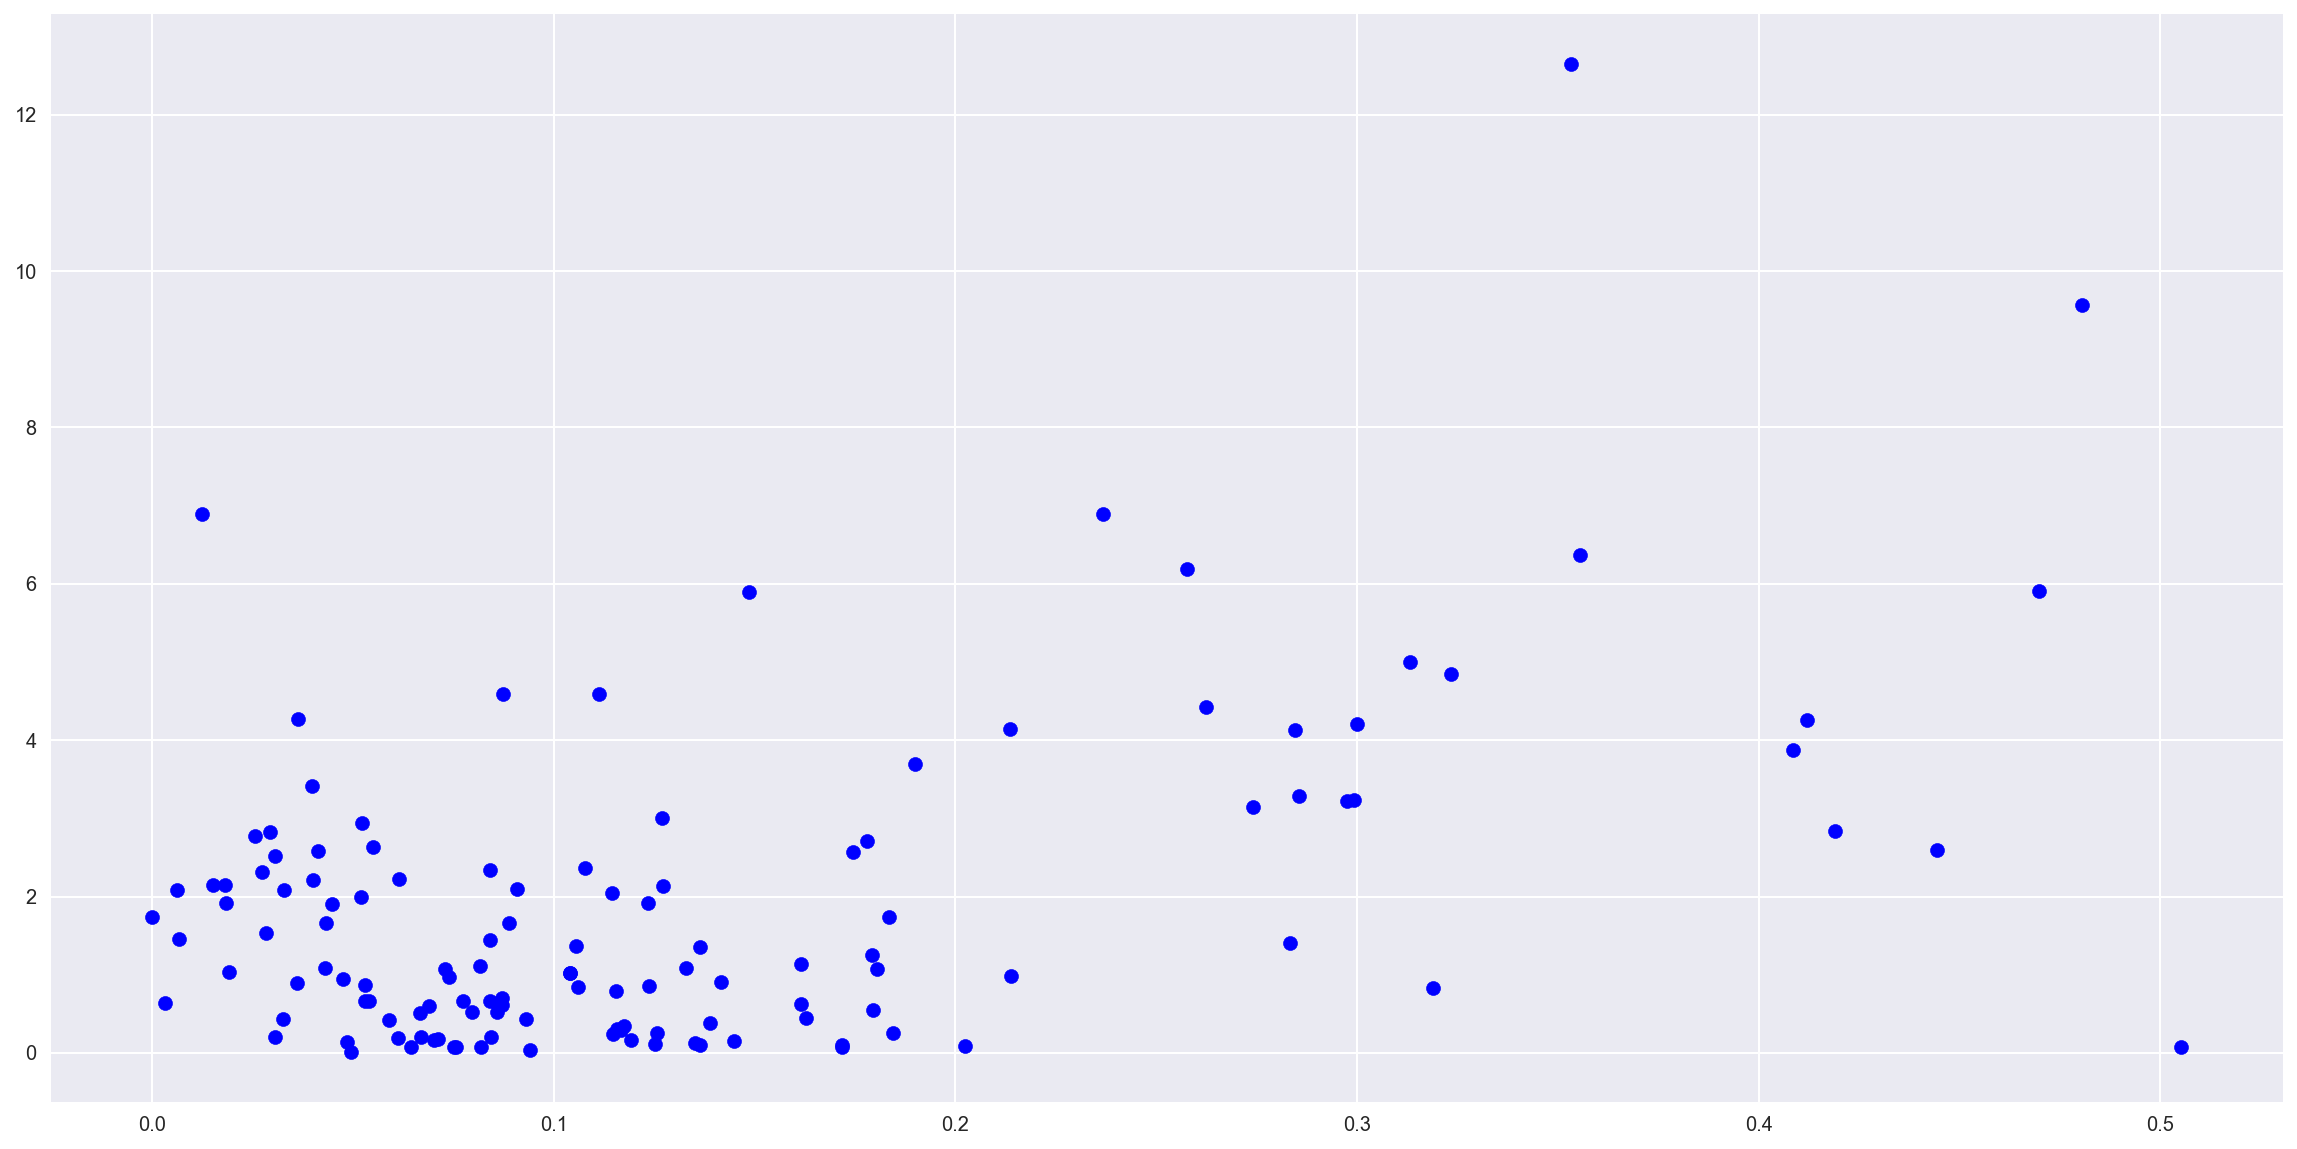

In [11]:
# Tested each individually, no strong correlations

plt.figure(figsize=(20, 10))
# plt.scatter(data['Trust (Government Corruption)'], (data['Fish Footprint']), marker='o', color='r')
plt.scatter(data['Trust (Government Corruption)'], (data['Carbon Footprint']), marker='o', color='b')
# plt.scatter(data['Trust (Government Corruption)'], (data['Forest Footprint']), marker='o', color='g')
# plt.scatter(data['Trust (Government Corruption)'], (data['Grazing Footprint']), marker='o', color='c')
plt.show()

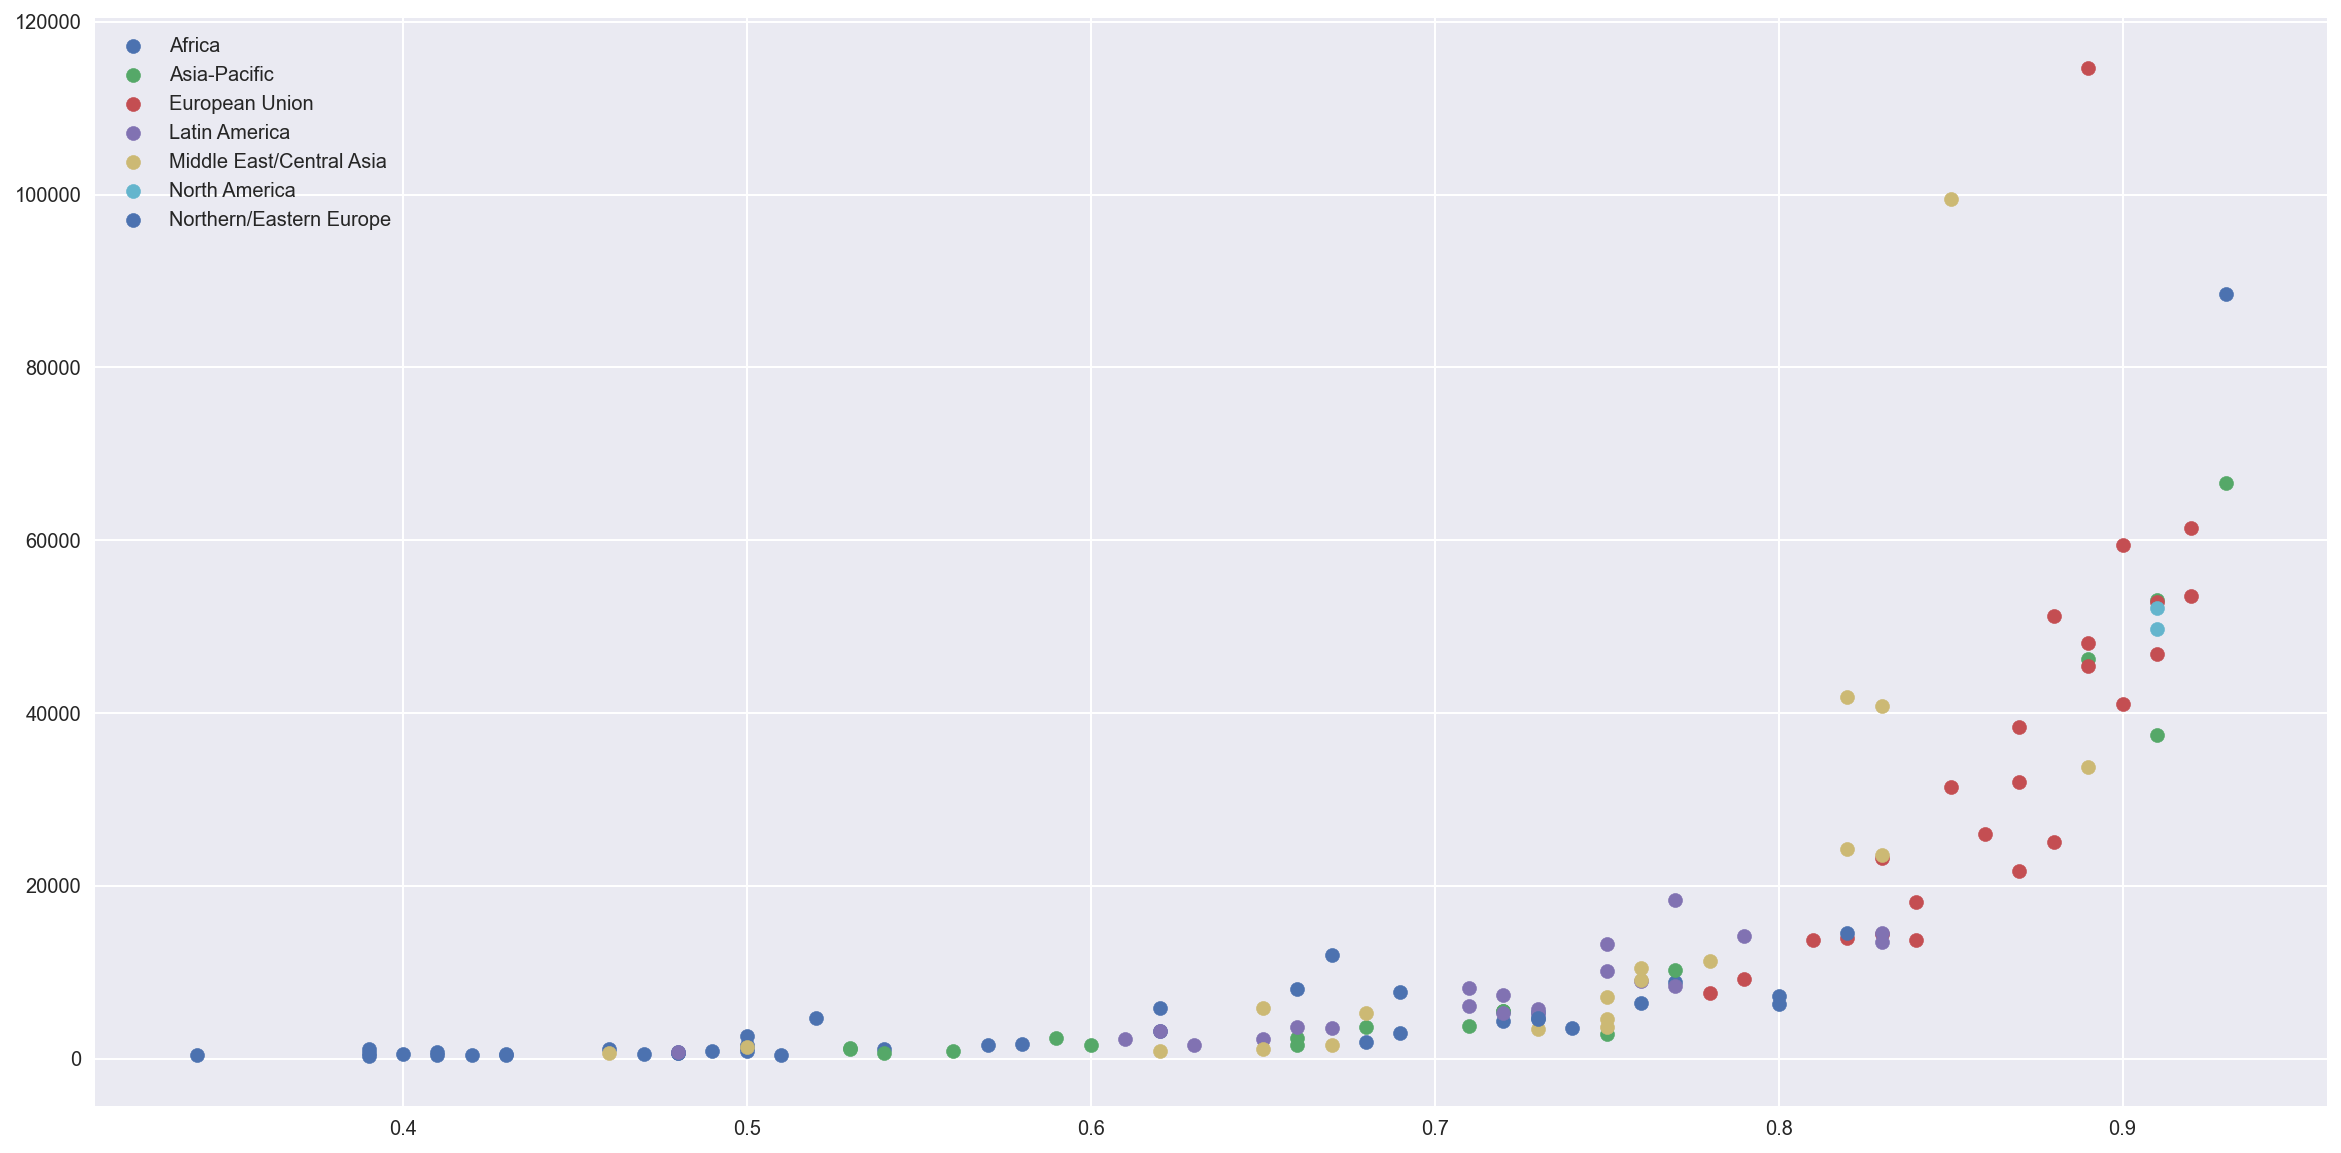

In [12]:
plt.figure(figsize=(20, 10))
labels = []
for k, d in data.groupby('Region_x'):
    labels.append(str(k))
    plt.scatter(d.HDI, d['GDP per Capita'])
plt.legend(labels)
plt.show()


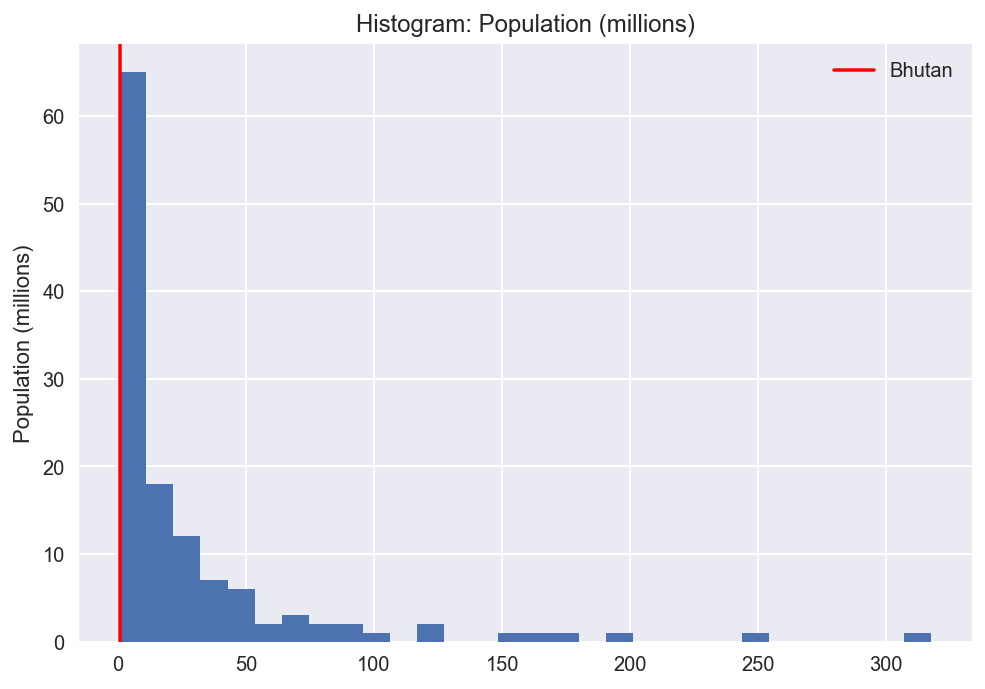

In [13]:
data1 = data[data['Population (millions)'] < 400]

plt.hist(data1['Population (millions)'], bins=30)
plt.axvline(x=data1['Population (millions)'][data1.Country == 'Bhutan'].values[0], c='r')
plt.title("Histogram: Population (millions)")
plt.ylabel('Population (millions)')
plt.legend(['Bhutan'])
# plt.savefig("Visualizations/Histogram - GDP per Capita.png", dpi=300, bbox_inches="tight")



{'polynomial': [1.1061361455615811e-05, 0.07514909113209714], 'determination': 0.0011603228590900446}
{'polynomial': [0.000102871568337722, -0.024806236502689465, 2.3007638530049292], 'determination': 0.05747169883320803}


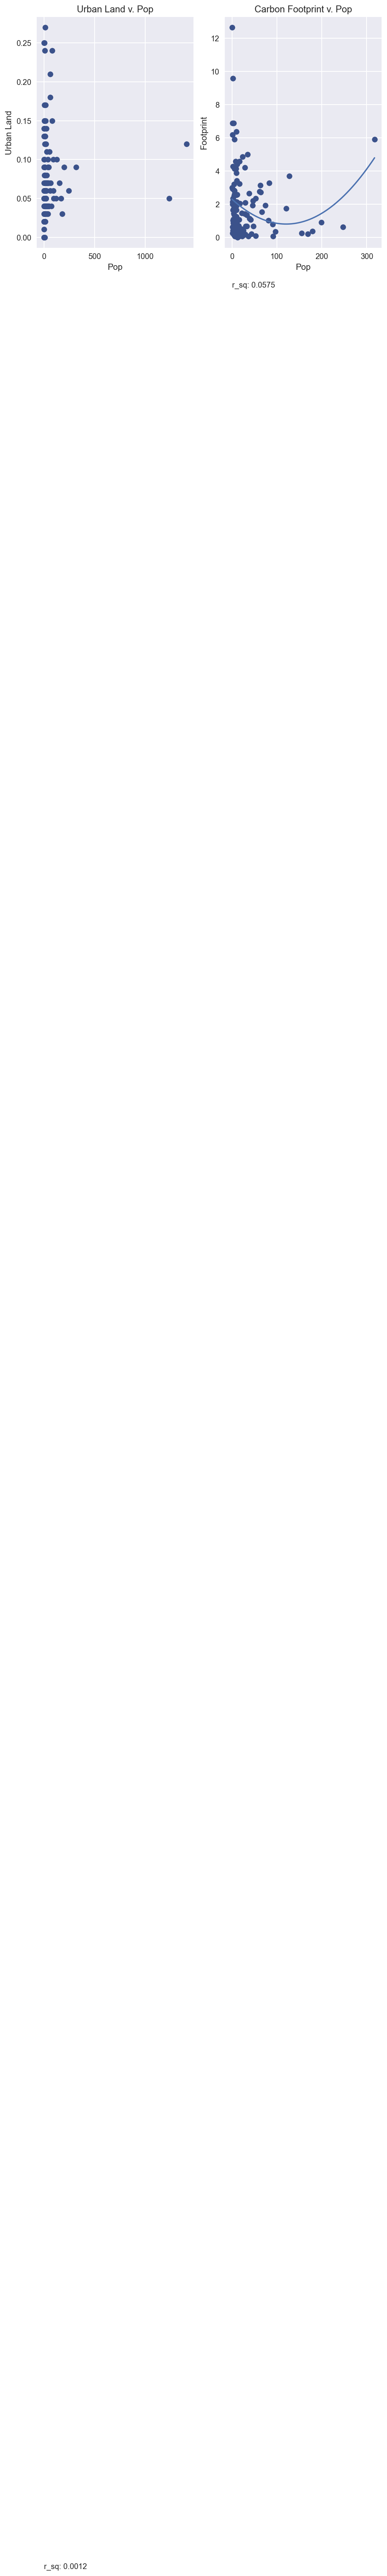

In [14]:
# data2 = data1[data1['Population (millions)']] < 400]

plt.subplot(121)
plt.title('Urban Land v. Pop')
plt.ylabel('Urban Land')
plt.xlabel('Pop')
results = polyfit(data['Population (millions)'].values,data['Urban Land'].values,1)
print(results)

plt.text(0,-3,'r_sq: %.4f' % results['determination'])

p = np.poly1d(results['polynomial'])
x = np.arange(0,max(data['Population (millions)']),0.01)
y = p(x)
# plt.plot(x,y)
plt.scatter(data['Population (millions)'],data['Urban Land'], marker='o', color=gdpColors[2])

plt.subplot(122)
plt.title('Carbon Footprint v. Pop')
plt.xlabel('Pop')
plt.ylabel('Footprint')
results = polyfit(data1['Population (millions)'].values,data1['Carbon Footprint'].values,2)
print(results)

plt.text(0,-3,'r_sq: %.4f' % results['determination'])


p = np.poly1d(results['polynomial'])
x = np.arange(0,max(data1['Population (millions)']),0.01)
y = p(x)
plt.plot(x,y)
plt.scatter(data1['Population (millions)'], (data1['Carbon Footprint']), marker='o', color=gdpColors[2])